###Importy

In [1]:
# tu budú zobrazené všetky importy knižnic, ktoré budeme v projekte používať
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

# neurónová sieť
import keras
from keras.models import Sequential
from keras.layers import Dense

# vizualizácia
import matplotlib.pyplot as plt

##1. Predpríprava dát
Ako prvý krok bude importnutie datasetu a jeho zobrazenie v pandas dataframe.

In [2]:
# pomocou knižnice pandas načítaj csv a vytvor z neho dataframe
dataset = pd.read_csv("/content/drive/MyDrive/Škola/NS/Laca_NS2021/dataset.csv")
# ukáž prvé riadky nového dataframu
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


Ďalším dôležitým krokom je rozdelenie dát do dvoch polí, kde v poli ***'X'*** budú vlastnosti telefónov a v poli ***'y'*** cenová kategória telefónov.

In [3]:
# vyber z dataframu hodnoty do 20 a ulož ich do pola 'X'
X = dataset.iloc[:,:20].values
# vyber z dataframu hodnoty od 20 a ulož ich do pola 'y' (iba prince_range teda)
y = dataset.iloc[:,20:].values

# zobraz vytvorené polia
print("Pole X: " + str(X))
print("\n")
print("Pole y: " + str(y))

Pole X: [[8.420e+02 0.000e+00 2.200e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.021e+03 1.000e+00 5.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [5.630e+02 1.000e+00 5.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 ...
 [1.911e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [1.512e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 1.000e+00]
 [5.100e+02 1.000e+00 2.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]]


Pole y: [[1]
 [2]
 [2]
 ...
 [3]
 [0]
 [3]]


### Normalizácia dát

Cieľom normalizácie je zmeniť hodnoty číselných stĺpcov v množine údajov na spoločnú škálu bez toho, aby došlo k narušeniu rozdielov v rozsahoch hodnôt. Nie je vždy nutné robiť normalizáciu. Vyžaduje sa, iba ak sa v datasete vyskytujú rôzne rozsahy. 

V tomto datasete je nutné spraviť normalizáciu pretože sa tu vyskytujú hodnoty ako `battery_power` čo sa pohybuje v tisíckach a hodnoty `clock_speed` ktoré sú aj ***0.6*** napríklad. 

Na jej implementáciu som použil `StandardScaler` z kniźnice `sklearn.preprocessing`

In [4]:
# vytvoríme nový StandardScaler
standard_scaler = StandardScaler()
# aplikujeme metódu 'fit_transfrom' z novo vytvoreného StandardScaleru na pole 
# vlastností 'X', ktorá sa prispôsobí údajom a potom ich transformuje. 
X = standard_scaler.fit_transform(X)
# následne vypíšeme prvý riadok už z transformovaného pola
print(X[0])

[-0.90259726 -0.9900495   0.83077942 -1.01918398 -0.76249466 -1.04396559
 -1.38064353  0.34073951  1.34924881 -1.10197128 -1.3057501  -1.40894856
 -1.14678403  0.39170341 -0.78498329  0.2831028   1.46249332 -1.78686097
 -1.00601811  0.98609664]


### Použitie OneHotEncoderu

Dôležitým krokom je proces prevodu celočíselných tried na binárne hodnoty aby som s nimi dokázal ďalej pracovať. Na uskutočnenie tohoto prevodu som použil práve `OneHotEncoder` z knižnice  `sklearn.preprocessing`. Spôsob fungovania možno vidieť na nasledujúcom obrázku, kde je zakódovaných prvých 5 riadkov datasetu: 

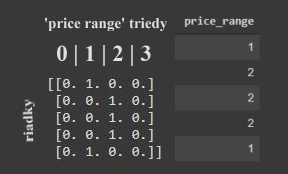

Teraz existuje pre `price_range` jedna jedinečná binárna hodnota. Nové vytvorené pole bude mať tvar ('**n**' * počet tried), kde n je počet riadkov v datasete.

In [5]:
# vytvoríme nový OneHotEncoder
one_hot_encoder = OneHotEncoder()
# aplikujeme metódu 'fit_transfrom' z novo vytvoreného OneHotEncoder na pole 
# tried 'y', ktorá sa prispôsobí údajom a potom ich transformuje do pola. 
y = one_hot_encoder.fit_transform(y).toarray()
# následne vypíšeme prvých 5. riadkov už z transformovaného pola
print(y[0:5])

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


### Rozdelenie dát na trénovacie a testovacie

Predtým než prejdem k budovaniu neurónovej siete je dôležité si rozdeliť dateset na dáta ***trénovacie*** a dáta ***testovacie***, kde na trénovacich dátach budem neurónovú sieť trénovať a na už testovanie natrénovanej neurónovej siete použijem testovacie dáta.

Na rozdelenie dát použijem funkciu `train_test_split` z knižnice `sklearn.model_selection`. Veľkosť trénovacich a testovacích dát určuje parameter `test_size`, kde napríklad hodnota ***0.2*** bude znamenať že budeme mať ***80%*** trénovacich dát a ***20%*** dát bude testovacích. 


In [6]:
# pomocou 'train_test_split' vytvoríme nasledovné premenné: 
# X_train kde budú uložené trénovacie dáta z pola 'X' (vlastnosti telefónov) v danom pomere test_size
# X_test kde budú uložené testovacie dáta z pola 'X' (vlastnosti telefónov) v danom pomere test_size
# y_train kde budú uložené trénovacie dáta z pola 'y' (cenové kategórie telefónov) v danom pomere test_size
# y_test kde budú uložené testovacie dáta z pola 'y' (cenové kategórie telefónov) v danom pomere test_size
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1)
# vypíšeme prvých 5 riadkov z každej premennej 
print("X - trénovacie dáta: \n" + str(X_train[0:5]) + "\n")
print("X - testovacie dáta: \n" + str(X_test[0:5]) + "\n")
print("y - trénovacie dáta: \n" + str(y_train[0:5]) + "\n")
print("y - testovacie dáta: \n" + str(y_test[0:5]) + "\n")

X - trénovacie dáta: 
[[-0.90032095 -0.9900495  -0.27243191  0.98117712 -0.76249466 -1.04396559
  -0.88453462  1.38116548 -0.60041021  1.08404594 -0.97586945 -0.11744769
  -1.20232784 -0.35982213  1.11426556  0.51270767  0.54717644 -1.78686097
  -1.00601811  0.98609664]
 [ 1.68556214  1.0100505   0.0953052   0.98117712 -0.99289039 -1.04396559
  -0.00256323 -1.04649512  0.69936247  1.08404594 -1.47069043  0.42349508
   0.87593624 -1.5419764   0.16464114  0.05349793  0.54717644 -1.78686097
   0.99401789 -1.01409939]
 [-1.3305427   1.0100505  -0.27243191 -1.01918398 -0.99289039  0.95788598
   1.09990101  0.68754816  1.57529623 -0.22756439 -0.97586945  2.41145977
   1.4961754  -1.00345994  1.11426556 -0.4057118   0.36411306  0.55964063
  -1.00601811 -1.01409939]
 [ 0.58838287  1.0100505  -0.76274805  0.98117712 -0.07130748  0.95788598
  -1.2152739  -1.39330378  0.36029134  1.52124939  1.66317579 -1.23314216
  -0.63531815  1.44937185 -0.78498329 -1.32413127 -1.46652072  0.55964063
  -1.0060

##2. Neurónová sieť

### Modelovanie

Na modelovanie neurónovej siete som použil ***Keras***, čo je knižnica neurónovej siete s otvoreným zdrojovým kódom napísaná v jazyku Python. Je navrhnutá tak, aby umožňovala rýchle experimenty s hlbokými neurónovými sieťami. Primárnym dôvodom, prečo som si vybral práve ***Keras*** je jeho užívateľská prívetivosť, modulárnosť a ľahká implementácia. 

In [7]:
# keďže máme jeden vstup a očakávame jeden výstup, vytvárame sekvenčný model.
# výstup každej pridanej vrstvy je vstupom do ďalšej vrstvy. 
neural_network = Sequential()
# pomocou '.add' pridávame vrstvy do neurónovej siete. 
# argumenty ktoré vstupujú do Dense vrsty je:
# výstup dimenzia, ktorá je v prvom prípade 16
# vstupná dimenzia v prvej vrstve, ktorá sa rovná počtu elementov, v našom prípade to je 20
# a aktivačná funkcia 
neural_network.add(Dense(16, input_dim=20, activation='relu'))
neural_network.add(Dense(12, activation='relu'))
# výstupná dimenzia vo výstupnej vrtsve je rovná 4, čo predstavuje cenovú kategóriu
# telefónov
# aktivačná funkcia je v tomto prípade 'softmax' keďže klasifikujeme viaceré triedy 
neural_network.add(Dense(4, activation='softmax'))
# nakoniec skontrolujeme, či vrstvy modelu vydávajú dáta správne a či sú parametre správne
# pomocou metódy summery() 
neural_network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 52        
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


Na špecifikovanie stratovej funkcie a optimalizátora použijem funkciu `compile`

* Keďže mám viaceré cenové triedy telefónov, ako stratovú funkciu použijem `categorical_crossentropy`.
* Optimalizátorom som si pre 1. pokus zvolil `adam`.
* `metrics` sa používajú na určenie spôsobu, akým chceme hodnotiť výkon neurónovej siete. Tu som to špecifikoval na `accuracy` (presnosť).  

In [8]:
neural_network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Trénovanie

Na trénovanie neurónovej siete použijem funkciu `fit` kde zadám:
* vytvorené trénovacie dáta ***x*** a ***y***
* počet iterácií (pre začiatok som si zvolil 150)
* `batch_size`, ktorý slúži k tomu, keď máme veľký dataset aby sme netrénovali 
veľa dát naraz ale v menších častiach postupne

In [9]:
network_training = neural_network.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=100, batch_size=50, shuffle=True)

Epoch 1/100
20/20 [==============================] - 1s 27ms/step - loss: 1.4867 - accuracy: 0.2362 - val_loss: 1.4298 - val_accuracy: 0.2680
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 1.4378 - accuracy: 0.2302 - val_loss: 1.4026 - val_accuracy: 0.2920
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 1.3932 - accuracy: 0.2906 - val_loss: 1.3822 - val_accuracy: 0.3130
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 1.3752 - accuracy: 0.2913 - val_loss: 1.3632 - val_accuracy: 0.3460
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 1.3414 - accuracy: 0.3539 - val_loss: 1.3423 - val_accuracy: 0.3770
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 1.3176 - accuracy: 0.3955 - val_loss: 1.3182 - val_accuracy: 0.4100
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 1.2879 - accuracy: 0.4273 - val_loss: 1.2877 - val_accuracy: 0.4280
Epoch 8/100


## 3. Testovanie

Prvým krokom bude získanie predpovede natrénovaného modelu na testovacích dátach. Na to som použil metódu `preditct()`

In [10]:
network_prediction = neural_network.predict(X_test)
# vytvoril som prázdny list, do ktorého budem ukladať najviac
# pravdepodobnú predpoveď natrénovaného modelu
prediction_list = list()
for i in range(len(network_prediction)):
    # prechádzam jednotlivými predikciami modelu a
    # z každého pridám najviac pravdepodobnú predpoveď do listu 
    prediction_list.append(np.argmax(network_prediction[i]))

# na skúšku si vypíšem prvý riadok z listu a porovnám to o krok neskôr so skutočnosťou
print("Predpoveď modelu: ", prediction_list[0])

Predpoveď modelu:  3


Ďalším krokom bude získanie skutočných dát

In [11]:
# vytvoril som prázdny list, do ktorého budem ukladať skutočné hodnoty
# z testovacích dát
testdata_list = list()
for i in range(len(y_test)):
    # prechádzam jednotlivými predikciami modelu a
    # z každého pridám skutočnú hodnotu do listu 
    testdata_list.append(np.argmax(y_test[i]))

# na skúšku si vypíšeme prvý riadok z listu skutočných testovacích dát a porovnáme s predpoveďou 
print("Skutočná hodnota: ", testdata_list[0])

Skutočná hodnota:  3


Nakoniec porovnám presnosť predpovede natrénovaného modelu so skutočnými dátami pomocou metódy `accuracy_score`, z knižnice `from sklearn.metrics`.
Výsledok vynásobím ešte ***100*** aby bol v percentách.  

In [12]:
print('Presnosť: ', accuracy_score(prediction_list, testdata_list)*100, "%")

Presnosť:  88.6 %


## 4. Vizualizácia

Na vizualizáciu dát použijem knižnicu `matplotlib.pyplot`.

Najskôr ju využijeme na zobrazenie presnosti na trénovacích a testovacích dátach. 

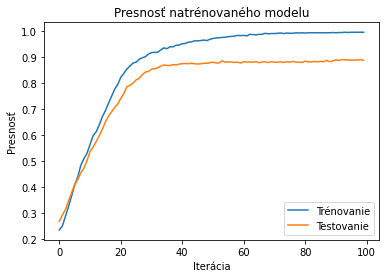

In [13]:
# vytvoríme grafy pre presnosť z trénovacích a validačných dát 
plt.plot(network_training.history['accuracy'])
plt.plot(network_training.history['val_accuracy'])
# pridám označenie pre 'x' a 'y' os grafu
plt.ylabel('Presnosť')
plt.xlabel('Iterácia')
# pridanie názvu grafu
plt.title('Vizualizácia presnosti modelu')
# zorazenie legendy v grafe
# argumnty sú názvy a poloha samotnej legendy  
plt.legend(['Trénovanie', 'Testovanie'], loc='lower right')
# zobrazenie grafu
plt.show()

Následne vizualizujeme chybu pri trénovacích a testovacích dátach

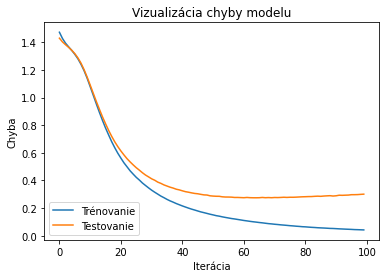

In [16]:
# vytvoríme grafy pre chybu z trénovacích a validačných dát 
plt.plot(network_training.history['loss']) 
plt.plot(network_training.history['val_loss']) 
# pridám označenie pre 'x' a 'y' os grafu
plt.ylabel('Chyba') 
plt.xlabel('Iterácia')
# pridanie názvu grafu
plt.title('Vizualizácia chyby modelu') 
# zorazenie legendy v grafe
# argumnty sú názvy a poloha samotnej legendy  
plt.legend(['Trénovanie', 'Testovanie'], loc='lower left') 
# zobrazenei grafu
plt.show()